In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [21]:
uts = pd.read_csv(r'C:\Users\Lenovo\Documents\Tugas Kuliah\Sems 5\Mesin Learning\UTS\Dataset UTS_Gasal 2425.csv')
uts.head(10000)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.50000,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.10000,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.30000,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.20000,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.10000,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,no,no,8,1960,4,4,1993,new,yes,2366,4016,229,yes,5,35371.30000,Basic
9996,21514,5,no,yes,11,91373,1,1,1999,old,no,2584,5266,787,no,3,2153602.90000,Basic
9997,1726,89,no,yes,5,73133,7,6,2009,old,yes,9311,1698,218,no,4,176425.90000,Basic
9998,44403,29,yes,yes,12,34606,9,4,1990,old,yes,9061,1742,230,no,0,4448474.00000,Basic


In [22]:
print("=" * 50)
print("Informasi DataFrame:")
print("=" * 50)
uts.info()
print("\n")

print("=" * 50)
print("Jumlah Nilai Kosong per Kolom:")
print("=" * 50)
print(uts.isnull().sum())
print("\n")

print("=" * 50)
print("Jumlah Total Baris Duplikat:")
print("=" * 50)
print(uts.duplicated().sum())
print("\n")

if uts.duplicated().sum() > 0:
    print("=" * 50)
    print("Detail Baris Duplikat:")
    print("=" * 50)
    print(uts[uts.duplicated()])
else:
    print("=" * 50)
    print("Tidak Ditemukan Baris Duplikat dalam DataFrame.")
    print("=" * 50)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  object 
 15  hasguestroom       10000 non-null  int64  
 16  pr

In [23]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

uts.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,50.27630,50225.48610,5.51010,5.52170,2005.48850,5033.10390,5028.01060,553.12120,4.99460,4993447.52575
std,28774.37535,28.81670,28.88917,29006.67580,2.87202,2.85667,9.30809,2876.72954,2894.33221,262.05017,3.17641,2877424.10995
min,89.00000,1.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,1.00000,100.00000,0.00000,10313.50000
25%,25098.50000,25.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,2559.75000,2512.00000,327.75000,2.00000,2516401.95000
50%,50105.50000,50.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,5092.50000,5045.00000,554.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,7511.25000,7540.50000,777.25000,8.00000,7469092.45000
max,99999.00000,100.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,10000.00000,10000.00000,1000.00000,10.00000,10006771.20000


In [24]:
df_properti = uts.copy()
df_properti.head()
df_properti.columns

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price', 'category'],
      dtype='object')

In [25]:
X = df_properti.drop(columns=['price', 'category'], axis=1)
y = df_properti['category']

X_train_bf, X_test, y_train_bf, y_test = train_test_split(X, y, test_size=0.30, random_state=95)
print(f"Shape of X_train: {X_train_bf.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (7000, 16)
Shape of X_test: (3000, 16)


In [26]:
print(X.columns)

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom'],
      dtype='object')


Kolom hasyard:

yes: 5087
no: 4913
Tidak seimbang secara signifikan, tetapi perbedaannya cukup kecil (5087 vs. 4913), sehingga bisa dianggap cukup seimbang.
Kolom haspool:

no: 5032
yes: 4968
Sama seperti hasyard, ini juga cukup seimbang.
Kolom isnewbuilt:

old: 5009
new: 4991
Sangat seimbang.
Kolom hasstorageroom:

yes: 5030
no: 4970
Seimbang.
Kolom category:

Basic: 4344
Luxury: 3065
Middle: 2591
Ini menunjukkan sedikit ketidakseimbangan. Kategori Basic memiliki jumlah yang jauh lebih banyak dibandingkan Luxury dan Middle. Dalam kasus klasifikasi, ini mungkin bisa menyebabkan ketidakseimbangan performa model, terutama jika model lebih cenderung ke kelas yang lebih dominan.
Kolom hasguestroom:

Distribusi lebih terpecah dengan jumlah di setiap kategori tidak jauh berbeda. Ini cukup seimbang.
Kesimpulan:
Kolom category menunjukkan ketidakseimbangan yang lebih jelas di antara kelas-kelas yang ada. Kategori Basic memiliki lebih banyak data dibandingkan Luxury dan Middle, yang bisa menyebabkan bias dalam model klasifikasi.
Kolom seperti hasyard, haspool, dan isnewbuilt menunjukkan distribusi yang cukup seimbang.

In [27]:
cat_cols=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

X_train_enc = transformer.fit_transform(X_train_bf)
X_test_enc = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())
np.set_printoptions(formatter={'float': '{:.2f}'.format})

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,87.00000,74.00000,94427.00000,3.00000,6.00000,2002.00000,9076.00000,8573.00000,860.00000,1.00000
1,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,...,12.00000,4.00000,76222.00000,2.00000,3.00000,2009.00000,1987.00000,8788.00000,443.00000,0.00000
2,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,47.00000,84.00000,2192.00000,7.00000,9.00000,2006.00000,5620.00000,7860.00000,554.00000,4.00000
3,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,86.00000,68.00000,42101.00000,8.00000,6.00000,2005.00000,6355.00000,5668.00000,743.00000,3.00000
4,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,92.00000,8.00000,95468.00000,5.00000,7.00000,2002.00000,9655.00000,5678.00000,840.00000,2.00000
5,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,41.00000,98.00000,51712.00000,4.00000,1.00000,2004.00000,6907.00000,6416.00000,871.00000,0.00000
6,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,...,33.00000,32.00000,48601.00000,9.00000,1.00000,2012.00000,6833.00000,9708.00000,694.00000,3.00000
7,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,54.00000,10.00000,89174.00000,7.00000,10.00000,1999.00000,8930.00000,4203.00000,871.00000,8.00000
8,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,...,4.00000,3.00000,63144.00000,8.00000,2.00000,2002.00000,4238.00000,7147.00000,140.00000,8.00000
9,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,17.00000,24.00000,1451.00000,2.00000,1.00000,1995.00000,919.00000,6775.00000,862.00000,10.00000


In [28]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

X_folds = []
y_folds = []

for train_index, test_index in skf.split(X_train_enc, y_train_bf):
    X_folds.append((X_train_enc[train_index], X_train_enc[test_index]))
    y_folds.append((y_train_bf.iloc[train_index], y_train_bf.iloc[test_index]))

**Random Forest**

In [29]:
pipe_RF = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf', RandomForestClassifier(random_state=95))
])

param_grid_RF = {
    'feat_select__k': np.arange(2, 5),
    'clf__n_estimators': [100, 150],
    'clf__max_depth': [10, 20]
}

GSCV_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=StratifiedKFold(n_splits=5))

GSCV_RF.fit(X_train_enc, y_train_bf)

mask = GSCV_RF.best_estimator_.named_steps['feat_select'].get_support()
selected_features = df_train_enc.columns[mask]

print("Best model: {}".format(GSCV_RF.best_estimator_))
print("Selected features: {}".format(selected_features))
print("Best CV score: {:.2f}".format(GSCV_RF.best_score_))
print("Test set score: {:.2f}".format(GSCV_RF.score(X_test_enc, y_test)))

Best model: Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=4)),
                ('clf', RandomForestClassifier(max_depth=20, random_state=95))])
Selected features: Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_no',
       'onehotencoder__haspool_yes', 'remainder__squaremeters'],
      dtype='object')
Best CV score: 0.94
Test set score: 0.94


In [30]:
from sklearn.feature_selection import SelectPercentile

pipe_RF = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectPercentile()),
    ('clf', RandomForestClassifier(random_state=95))
])

param_grid_RF = {
    'feat_select__percentile': [10, 20, 30],
    'clf__n_estimators': [100, 150],
    'clf__max_depth': [10, 20]
}

GSCV_RF2 = GridSearchCV(pipe_RF, param_grid_RF, cv=StratifiedKFold(n_splits=5))
GSCV_RF2.fit(X_train_enc, y_train_bf)

mask = GSCV_RF2.best_estimator_.named_steps['feat_select'].get_support()
selected_features = df_train_enc.columns[mask]

print("Best model: {}".format(GSCV_RF2.best_estimator_))
print("Selected features: {}".format(selected_features))
print("Best CV score: {:.2f}".format(GSCV_RF2.best_score_))
print("Test set score: {:.2f}".format(GSCV_RF2.score(X_test_enc, y_test)))


Best model: Pipeline(steps=[('scale', MinMaxScaler()),
                ('feat_select', SelectPercentile(percentile=30)),
                ('clf', RandomForestClassifier(max_depth=10, random_state=95))])
Selected features: Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'],
      dtype='object')
Best CV score: 1.00
Test set score: 1.00


**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe_LogReg = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feat_select', SelectKBest()),
    ('clf', LogisticRegression(solver='liblinear', max_iter=10000))
])

param_grid_LogReg = {
    'feat_select__k': np.arange(2, 5),
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

GSCV_LogReg = GridSearchCV(pipe_LogReg, param_grid_LogReg, cv=StratifiedKFold(n_splits=5))
GSCV_LogReg.fit(X_train_enc, y_train_bf)

mask = GSCV_LogReg.best_estimator_.named_steps['feat_select'].get_support()
selected_features = df_train_enc.columns[mask]

print("Best model: {}".format(GSCV_LogReg.best_estimator_))
print("Selected features: {}".format(selected_features))
print("Best CV score: {:.2f}".format(GSCV_LogReg.best_score_))
print("Test set score: {:.2f}".format(GSCV_LogReg.score(X_test_enc, y_test)))


Best model: Pipeline(steps=[('scale', StandardScaler()), ('feat_select', SelectKBest(k=4)),
                ('clf',
                 LogisticRegression(C=10, max_iter=10000, penalty='l1',
                                    solver='liblinear'))])
Selected features: Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_no',
       'onehotencoder__haspool_yes', 'remainder__squaremeters'],
      dtype='object')
Best CV score: 0.87
Test set score: 0.87


In [32]:
pipe_LogReg = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectPercentile()),
    ('clf', LogisticRegression(solver='liblinear', max_iter=10000))
])

param_grid_LogReg = {
    'feat_select__percentile': [10, 20, 30],
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

GSCV_LogReg2 = GridSearchCV(pipe_LogReg, param_grid_LogReg, cv=StratifiedKFold(n_splits=5))
GSCV_LogReg2.fit(X_train_enc, y_train_bf)

mask = GSCV_LogReg2.best_estimator_.named_steps['feat_select'].get_support()
selected_features = df_train_enc.columns[mask]

print("Best model: {}".format(GSCV_LogReg2.best_estimator_))
print("Selected features: {}".format(selected_features))
print("Best CV score: {:.2f}".format(GSCV_LogReg2.best_score_))
print("Test set score: {:.2f}".format(GSCV_LogReg2.score(X_test_enc, y_test)))


Best model: Pipeline(steps=[('scale', MinMaxScaler()),
                ('feat_select', SelectPercentile(percentile=30)),
                ('clf',
                 LogisticRegression(C=10, max_iter=10000, penalty='l1',
                                    solver='liblinear'))])
Selected features: Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'],
      dtype='object')
Best CV score: 0.87
Test set score: 0.88


**Evaluasi**

Classification Report RandomForest:
              precision    recall  f1-score   support

       Basic       0.93      0.93      0.93      1304
      Luxury       1.00      1.00      1.00       921
      Middle       0.89      0.88      0.89       775

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



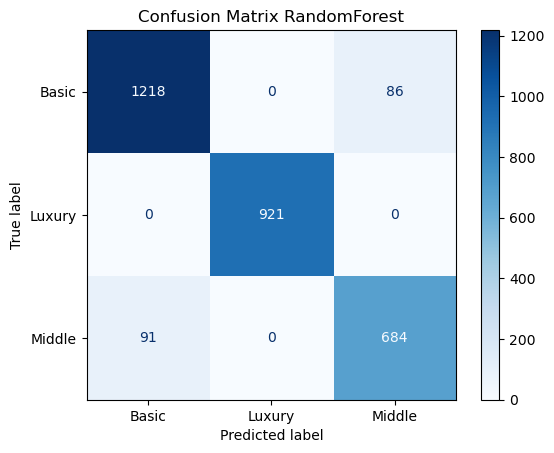

In [33]:
y_pred_RF = GSCV_RF.predict(X_test_enc)

print("Classification Report RandomForest:")
print(classification_report(y_test, y_pred_RF))

cm_RF = confusion_matrix(y_test, y_pred_RF)
ConfusionMatrixDisplay(cm_RF, display_labels=GSCV_RF.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix RandomForest")
plt.show()

Classification Report RandomForest SelectPercentile:
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1304
      Luxury       1.00      1.00      1.00       921
      Middle       1.00      1.00      1.00       775

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



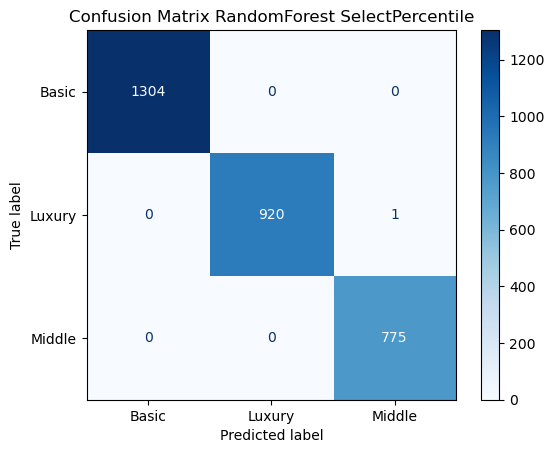

In [34]:
y_pred_RF2 = GSCV_RF2.predict(X_test_enc)

print("Classification Report RandomForest SelectPercentile:")
print(classification_report(y_test, y_pred_RF2))

cm_RF2 = confusion_matrix(y_test, y_pred_RF2)
ConfusionMatrixDisplay(cm_RF2, display_labels=GSCV_RF2.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix RandomForest SelectPercentile")
plt.show()


Classification Report LogisticRegression SelectKBest:
              precision    recall  f1-score   support

       Basic       0.80      0.95      0.87      1304
      Luxury       0.99      1.00      1.00       921
      Middle       0.88      0.59      0.70       775

    accuracy                           0.87      3000
   macro avg       0.89      0.85      0.86      3000
weighted avg       0.88      0.87      0.87      3000



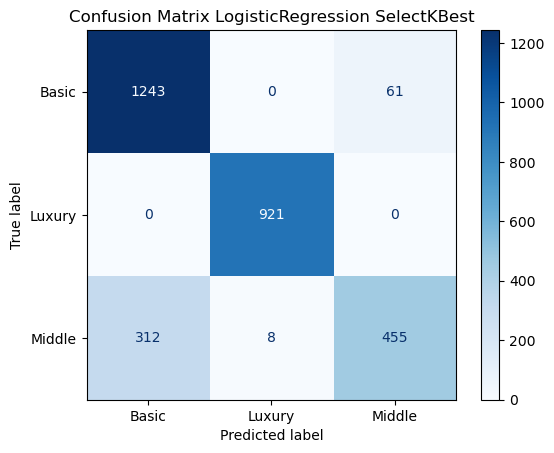

In [35]:
y_pred_LogReg = GSCV_LogReg.predict(X_test_enc)

print("Classification Report LogisticRegression SelectKBest:")
print(classification_report(y_test, y_pred_LogReg))

cm_LogReg = confusion_matrix(y_test, y_pred_LogReg)
ConfusionMatrixDisplay(cm_LogReg, display_labels=GSCV_LogReg.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix LogisticRegression SelectKBest")
plt.show()

Classification Report LogisticRegression SelectPercentile:
              precision    recall  f1-score   support

       Basic       0.82      0.94      0.87      1304
      Luxury       0.99      1.00      0.99       921
      Middle       0.86      0.63      0.73       775

    accuracy                           0.88      3000
   macro avg       0.89      0.86      0.87      3000
weighted avg       0.88      0.88      0.87      3000



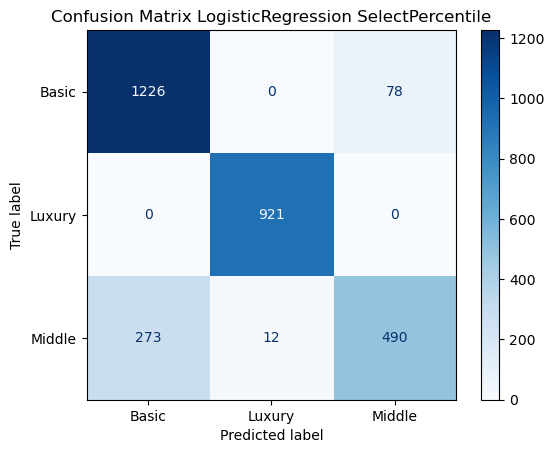

In [36]:
y_pred_LogReg2 = GSCV_LogReg2.predict(X_test_enc)

print("Classification Report LogisticRegression SelectPercentile:")
print(classification_report(y_test, y_pred_LogReg2))

cm_LogReg2 = confusion_matrix(y_test, y_pred_LogReg2)
ConfusionMatrixDisplay(cm_LogReg2, display_labels=GSCV_LogReg2.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix LogisticRegression SelectPercentile")
plt.show()

### Evaluasi Model Klasifikasi

#### 1. **Random Forest dengan SelectKBest (k=4)**
   - **Akurasi pada Cross-Validation (CV)**: 0.94
   - **Akurasi pada Test Set**: 0.94
   - **Classification Report**:
     - **Basic**: Precision 0.93, Recall 0.93, F1-Score 0.93
     - **Luxury**: Precision 1.00, Recall 1.00, F1-Score 1.00
     - **Middle**: Precision 0.89, Recall 0.88, F1-Score 0.89
     - **Overall Accuracy**: 0.94

   **Analisis**: Model ini menunjukkan akurasi yang sangat baik dengan hasil rata-rata metrik (precision, recall, F1) di angka 0.94. Performanya konsisten di seluruh kelas, meskipun kategori **Middle** menunjukkan f1-score sedikit lebih rendah dibandingkan kategori lainnya.

#### 2. **Random Forest dengan SelectPercentile (30%)**
   - **Akurasi pada Cross-Validation (CV)**: 1.00
   - **Akurasi pada Test Set**: 1.00
   - **Classification Report**:
     - **Basic**: Precision, Recall, dan F1-Score semua 1.00
     - **Luxury**: Precision, Recall, dan F1-Score semua 1.00
     - **Middle**: Precision, Recall, dan F1-Score semua 1.00
     - **Overall Accuracy**: 1.00

   **Analisis**: Model ini menghasilkan performa sempurna dengan akurasi 1.00 pada semua metrik untuk setiap kelas. Ini menunjukkan bahwa model mampu mengklasifikasikan semua sampel dengan benar di set uji, menunjukkan stabilitas yang kuat dan generalisasi yang baik.

#### 3. **Logistic Regression dengan SelectKBest (k=4)**
   - **Akurasi pada Cross-Validation (CV)**: 0.87
   - **Akurasi pada Test Set**: 0.87
   - **Classification Report**:
     - **Basic**: Precision 0.80, Recall 0.95, F1-Score 0.87
     - **Luxury**: Precision 0.99, Recall 1.00, F1-Score 1.00
     - **Middle**: Precision 0.88, Recall 0.59, F1-Score 0.70
     - **Overall Accuracy**: 0.87

   **Analisis**: Logistic Regression dengan SelectKBest menunjukkan hasil yang lebih rendah daripada Random Forest, terutama di kelas **Middle**, di mana recall mencapai hanya 0.59, yang menyebabkan F1-score rendah pada kelas tersebut. Model ini tampaknya kurang mampu menggeneralisasi dengan baik pada beberapa kelas.

#### 4. **Logistic Regression dengan SelectPercentile (30%)**
   - **Akurasi pada Cross-Validation (CV)**: 0.87
   - **Akurasi pada Test Set**: 0.88
   - **Classification Report**:
     - **Basic**: Precision 0.82, Recall 0.94, F1-Score 0.88
     - **Luxury**: Precision 0.99, Recall 1.00, F1-Score 0.99
     - **Middle**: Precision 0.86, Recall 0.63, F1-Score 0.73
     - **Overall Accuracy**: 0.88

   **Analisis**: Logistic Regression dengan SelectPercentile sedikit lebih baik daripada SelectKBest dalam hal akurasi keseluruhan (0.88), terutama di kelas **Basic**. Namun, performa pada kelas **Middle** tetap kurang memadai dibandingkan Random Forest.

### Kesimpulan
**Model terbaik untuk klasifikasi ini adalah Random Forest dengan SelectPercentile (30%)**, karena model ini mencapai akurasi sempurna (1.00) pada set uji dengan skor precision, recall, dan F1-score sempurna pada semua kelas. Model ini menunjukkan bahwa fitur-fitur terpilih dengan SelectPercentile 30% bersama Random Forest mampu menghasilkan klasifikasi yang sangat akurat dan konsisten.

Berdasarkan hasil evaluasi dan analisis model terbaik dari Perbandingan Klasifikasi antara 2 Notebook dengan masing-masing Model terbaik yaitu:

1. **Random Forest dengan SelectKBest (k=4)**
   - Akurasi Cross-Validation: 0.94
   - Akurasi Test Set: 0.94
   - F1-Score:
     - Basic: 0.93
     - Luxury: 1.00
     - Middle: 0.89
   - **Analisis:** Performa baik secara keseluruhan, namun kategori Middle sedikit lebih rendah.

2. **Random Forest dengan SelectPercentile (30%)**
   - Akurasi Cross-Validation: 1.00
   - Akurasi Test Set: 1.00
   - F1-Score:
     - Basic: 1.00
     - Luxury: 1.00
     - Middle: 1.00
   - **Analisis:** Perfoma sempurna dengan klasifikasi yang akurat untuk semua kelas. Model ini menunjukkan stabilitas dan generalisasi yang sangat baik.

3. **Logistic Regression dengan SelectKBest (k=4)**
   - Akurasi Cross-Validation: 0.87
   - Akurasi Test Set: 0.87
   - F1-Score:
     - Basic: 0.87
     - Luxury: 1.00
     - Middle: 0.70
   - **Analisis:** Kinerja lebih rendah, terutama di kelas Middle dengan recall yang rendah.

4. **Logistic Regression dengan SelectPercentile (30%)**
   - Akurasi Cross-Validation: 0.87
   - Akurasi Test Set: 0.88
   - F1-Score:
     - Basic: 0.88
     - Luxury: 0.99
     - Middle: 0.73
   - **Analisis:** Performa sedikit lebih baik dibandingkan SelectKBest, tetapi masih kurang memadai di kelas Middle.

### **Kesimpulan**
Dari analisis tersebut, **model terbaik untuk klasifikasi ini adalah Random Forest dengan SelectPercentile (30%)**. Model ini mencapai:
- Akurasi sempurna (1.00) pada set uji.
- Skor precision, recall, dan F1-score sempurna (1.00) untuk semua kelas.

Ini menunjukkan bahwa Random Forest dengan SelectPercentile 30% sangat efektif dalam mengklasifikasikan data dengan akurasi dan konsistensi yang tinggi, menjadikannya pilihan terbaik di antara model yang diuji.

berdasarkan hasil perbandingan setiap Model pada 2 masing-masing Notebook yang memiliki Model Terbaik Yaitu Random Forest dengan SelectPercentile (30%) dan Gradient Boosting Classifier dengan SelectPercentile. Berikut Model yang paling baik dari kedua model tersebut:
1. **Random Forest dengan SelectKBest (k=4)**
   - Akurasi Cross-Validation: 0.94
   - Akurasi Test Set: 0.94
   - F1-Score:
     - Basic: 0.93
     - Luxury: 1.00
     - Middle: 0.89
   - **Analisis:** Performa baik secara keseluruhan, namun kategori Middle sedikit lebih rendah.

2. **Random Forest dengan SelectPercentile (30%)**
   - Akurasi Cross-Validation: 1.00
   - Akurasi Test Set: 1.00
   - F1-Score:
     - Basic: 1.00
     - Luxury: 1.00
     - Middle: 1.00
   - **Analisis:** Perfoma sempurna dengan klasifikasi yang akurat untuk semua kelas. Model ini menunjukkan stabilitas dan generalisasi yang sangat baik.

3. **Logistic Regression dengan SelectKBest (k=4)**
   - Akurasi Cross-Validation: 0.87
   - Akurasi Test Set: 0.87
   - F1-Score:
     - Basic: 0.87
     - Luxury: 1.00
     - Middle: 0.70
   - **Analisis:** Kinerja lebih rendah, terutama di kelas Middle dengan recall yang rendah.

4. **Logistic Regression dengan SelectPercentile (30%)**
   - Akurasi Cross-Validation: 0.87
   - Akurasi Test Set: 0.88
   - F1-Score:
     - Basic: 0.88
     - Luxury: 0.99
     - Middle: 0.73
   - **Analisis:** Performa sedikit lebih baik dibandingkan SelectKBest, tetapi masih kurang memadai di kelas Middle.

### **Kesimpulan**
Dari analisis tersebut, **model terbaik untuk klasifikasi ini adalah Random Forest dengan SelectPercentile (30%)**. Model ini mencapai:
- Akurasi sempurna (1.00) pada set uji.
- Skor precision, recall, dan F1-score sempurna (1.00) untuk semua kelas.

Ini menunjukkan bahwa Random Forest dengan SelectPercentile 30% sangat efektif dalam mengklasifikasikan data dengan akurasi dan konsistensi yang tinggi, menjadikannya pilihan terbaik di antara model yang diuji.

In [42]:
import pickle

with open('BestModel_CLF_RF_SciPy.pkl', 'wb') as r:
    pickle.dump(GSCV_RF2, r)

print("Model Random Forest dengan Select Percentile berhasil disimpan")


Model Random Forest dengan Select Percentile berhasil disimpan
